### **Implementation Details**


#### **Step 3: Exploratory Analysis for Topic Modeling**





In [2]:
# Libraries

import nltk
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import re
import string

# Download the lexicon
nltk.download("vader_lexicon")
from nltk.probability import FreqDist

from wordcloud import WordCloud

# Import the lexicon 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Create an instance of SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()

c:\Users\pdhiman\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pdhiman\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
df = pd.read_pickle('../source/cleaned_df.pkl')
df.head()

,Unnamed: 0,Date,ID,location,tweet,num_of_likes,num_of_retweet,language,cleaned_tweets
0,0,2022-11-07 23:59:59+00:00,1589769667765469186,"California, USA",Taking into account personal contributions &am...,2,1,en,taking account personal bad everyone better tr...
1,1,2022-11-07 23:59:59+00:00,1589769667652235267,@jlo follows ♡ 01.29.21,whats your fav song?\n\n❥ I’m voting #Jennifer...,0,10,en,whats song voting
2,2,2022-11-07 23:59:59+00:00,1589769667127934977,Unknown,@MayoIsSpicyy He is allowed to speak his opini...,0,0,en,speak opinion like rest u opinion vote republi...
3,3,2022-11-07 23:59:59+00:00,1589769666918244352,USA,HEY NY DISTRICT 10! PLEASE VOTE FOR @danielsgo...,1,1,en,hey district please vote
4,4,2022-11-07 23:59:59+00:00,1589769666679144448,DMV,@YDanasmithdutra @BaddCompani @politicalblond ...,3,0,en,vote blue matter


In [4]:
# Calculate Tokens
def unfiltered_tokens(text):
    wordtokens = nltk.word_tokenize(text)
    return wordtokens

data_tweets = df['cleaned_tweets']
unfilterd_data = list(map(unfiltered_tokens, data_tweets))
flat_unfiltered = [item for sublist in unfilterd_data for item in sublist]
# getting frequency distribution
corpus_freqdist = FreqDist(flat_unfiltered)
corpus_freqdist.most_common(20)


[('vote', 9827),
 ('voting', 4086),
 ('election', 3992),
 ('democrat', 3238),
 ('republican', 1980),
 ('people', 1836),
 ('tomorrow', 1538),
 ('day', 1299),
 ('year', 1280),
 ('like', 1124),
 ('get', 1100),
 ('pay', 1012),
 ('u', 981),
 ('favorite', 972),
 ('red', 930),
 ('blue', 868),
 ('dont', 835),
 ('one', 828),
 ('want', 803),
 ('would', 793)]

In [24]:
# create counts of hate and not hate with values and words
clean_bar_counts = [x[1] for x in corpus_freqdist.most_common(20)]
clean_bar_words = [x[0] for x in corpus_freqdist.most_common(20)]



# set the color of the bar graphs
color = cm.BuGn(np.linspace(.4,.8, 30))

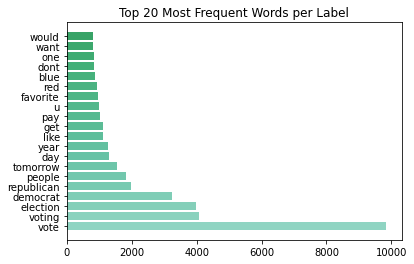

In [31]:
plt.barh(y=clean_bar_words, width=clean_bar_counts, color=color)

plt.title('Top 20 Most Frequent Words per Label')

plt.savefig('../visualization/label_word_count_y.png', bbox_inches = "tight", pad_inches=.5)
plt.show()

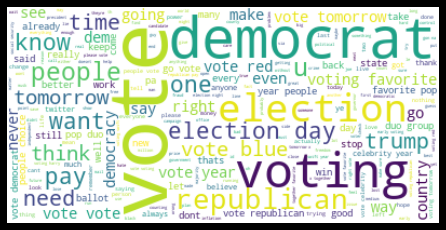

<Figure size 432x288 with 0 Axes>

In [32]:
tweet_string = ','.join(list(df['cleaned_tweets'].values))  ## Joining processed tweets to form a string
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')  # Wordcloud Object
word_object = wordcloud.generate(tweet_string)  ## Generating wordcloud

plt.figure(figsize=(6,6), facecolor='k')
plt.imshow(word_object, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
plt.savefig('../visualization/wordcloud.png')